In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [47]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [49]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [50]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [51]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [52]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [53]:
# Create a session
Session = Session(engine)

# Exploratory Precipitation Analysis

In [54]:
# Find the most recent date in the data set.
recent_date = Session.query(func.max(Measurement.date)).one()
recent_date


('2017-08-23',)

In [55]:
import datetime as dt

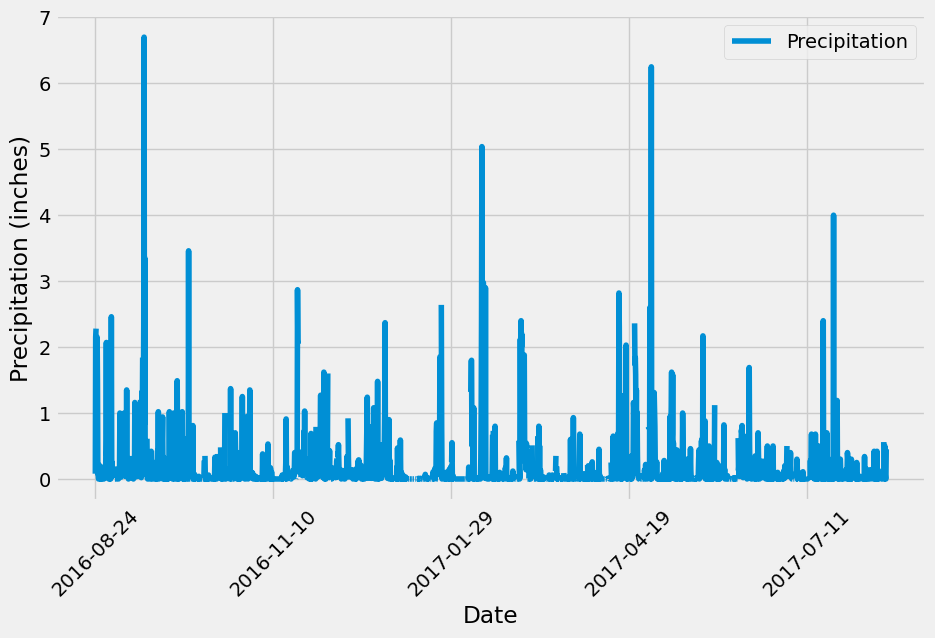

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_recent_date = recent_date[0]

# Calculate the date one year from the last date in data set.
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago_date = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_date_data = Session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_date_df = pd.DataFrame(precipitation_date_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_date_df = precipitation_date_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_date_df.set_index('Date', inplace=True)
precipitation_date_df.plot(y='Precipitation', figsize=(10, 6))
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Precipitation (inches)')
plt.show()

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_date_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
total_stations = Session.query(Station.station).count()
total_stations

9

In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = Session.query(Station.station, func.count(Station.station).label('count')).\
    group_by(Station.station).order_by(func.count(Station.station).desc()).all()
active_stations

[('USC00519523', 1),
 ('USC00519397', 1),
 ('USC00519281', 1),
 ('USC00518838', 1),
 ('USC00517948', 1),
 ('USC00516128', 1),
 ('USC00514830', 1),
 ('USC00513117', 1),
 ('USC00511918', 1)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#Most active station
most_active_station_id = active_stations[0][0]

#Temperature measurements
min_temp_stat = Session.query(func.min(Measurement.tobs)).filter(Station.station == most_active_station_id).one()[0]
max_temp_stat = Session.query(func.max(Measurement.tobs)).filter(Station.station == most_active_station_id).one()[0]
avg_temp_stat = round(Session.query(func.avg(Measurement.tobs)).filter(Station.station == most_active_station_id).one()[0], 2)

print(f"Lowest temperature: {min_temp_stat}")
print(f"Highest temperature: {max_temp_stat}")
print(f"Average temperature: {avg_temp_stat}")

Lowest temperature: 53.0
Highest temperature: 87.0
Average temperature: 73.1


/var/folders/sn/wbw1h1x1453cs98dqd5z86h80000gn/T/ipykernel_71183/3565531652.py:7: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  min_temp_stat = Session.query(func.min(Measurement.tobs)).filter(Station.station == most_active_station_id).one()[0]
/var/folders/sn/wbw1h1x1453cs98dqd5z86h80000gn/T/ipykernel_71183/3565531652.py:8: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  max_temp_stat = Session.query(func.max(Measurement.tobs)).filter(Station.station == most_active_station_id).one()[0]
/var/folders/sn/wbw1h1x1453cs98dqd5z86h80000gn/T/ipykernel_71183/3565531652.py:9: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element 

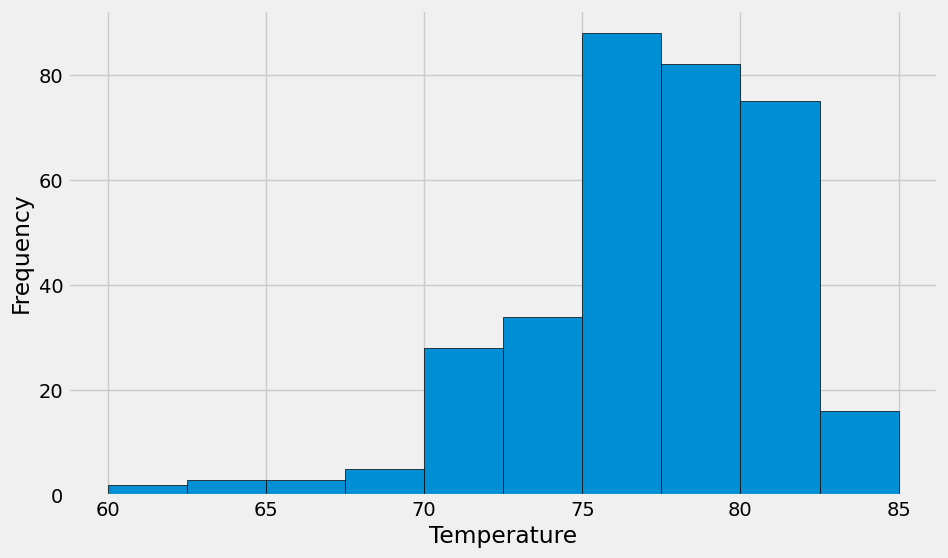

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data and temperature scores
temperature_date_data = Session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago_date, Measurement.station == most_active_station_id).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temperature_date_df = pd.DataFrame(temperature_date_data, columns=['Date', 'Temperature'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.hist(temperature_date_df['Temperature'], bins=10, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Close Session

In [62]:
# Close Session
Session.close()
